In [ ]:
In this project, you are going to work on the Census Income dataset from the
UCI Machine Learning Repository that contains the income information for over
48,000 individuals taken from the 1994 US census.
For more details about this dataset, you can refer to the following link:
https://archive.ics.uci.edu/ml/datasets/census+income
    


In [ ]:
Problem Statement:
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data_adult = pd.read_csv("Census-adult.csv")

In [80]:
data_adult.shape

(48842, 15)

In [81]:
data_adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [82]:
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [83]:
data_adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [84]:
##dont see any null data

In [85]:
data_adult.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [86]:
data_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [87]:
for i in data_adult.columns:
    #print(i)
    #if i == 'workclass':
        data_adult[i].replace('?',np.nan, inplace=True)

In [88]:
data_adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [89]:
## now we can see the null values

In [90]:
data_adult.isnull().sum().sum()

6465

In [91]:
6465/48842 *100

13.236558699479955

In [92]:
### around 13% has null value.lets drop the rows with null values

In [93]:
data_adult.dropna(inplace = True)

In [94]:
data_adult.shape

(45222, 15)

In [95]:
48842 - 45222

3620

In [96]:
##3620 rosw of data loss. 
3620/48842 * 100

7.411653904426519

In [97]:
##only 7% data loss, can be managed/

In [98]:
data_adult.duplicated().sum()

47

In [99]:
data_adult.drop_duplicates(inplace = True)

In [100]:
data_adult.shape

(45175, 15)

In [101]:
class_income = data_adult['income'].value_counts()

In [102]:
class_income

<=50K    33973
>50K     11202
Name: income, dtype: int64

<Axes: >

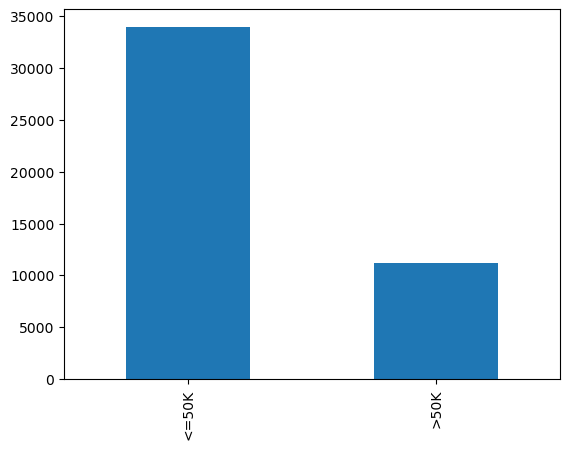

In [103]:
class_income.plot(kind = 'bar')

In [155]:
#we dont understand fnlwgt column, lets drop it

In [107]:
data_adult.drop('fnlwgt' , axis = 1, inplace = True)

In [108]:
data_adult

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [109]:
data_adult.education.value_counts()

HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64

In [110]:
data_adult['educational-num'].value_counts()

9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: educational-num, dtype: int64

In [111]:
## lets drop education column 

In [112]:
data_adult.drop('education' , axis = 1, inplace = True)

In [113]:
data_adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [114]:
data_adult['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [156]:
data_adult['capital-loss'].value_counts()

0       43035
1902      294
1977      246
1887      228
2415       68
        ...  
419         1
155         1
1539        1
2201        1
1421        1
Name: capital-loss, Length: 97, dtype: int64

In [ ]:
##label encoding 

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
col_list = list(data_adult.columns) 

In [117]:
le=LabelEncoder()
for i in col_list:
  if data_adult[i].dtype=='object':
    data_adult[i]=le.fit_transform(data_adult[i])

In [118]:
X = data_adult.iloc[::,0:-1:]

In [119]:
X

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,7,4,6,3,2,1,0,0,40,38
1,38,2,9,2,4,0,4,1,0,0,50,38
2,28,1,12,2,10,0,4,1,0,0,40,38
3,44,2,10,2,6,0,2,1,7688,0,40,38
5,34,2,6,4,7,1,4,1,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,12,2,12,5,4,0,0,0,38,38
48838,40,2,9,2,6,0,4,1,0,0,40,38
48839,58,2,9,6,0,4,4,0,0,0,40,38
48840,22,2,9,4,0,3,4,1,0,0,20,38


In [120]:
Y = data_adult.iloc[::,-1::]

In [121]:
Y

,income
0,0
1,0
2,1
3,1
5,0
...,...
48837,0
48838,1
48839,0
48840,0


In [122]:
##train test split

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

In [125]:
##classification  algorithm.

In [128]:
#Logistic regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr = LogisticRegression()

In [131]:
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
test_pred = lr.predict(x_test)

In [133]:
from sklearn.metrics import *

In [134]:
accuracy_score(y_test,test_pred)

0.8052063042323357

In [135]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [136]:
y_test

,income
32612,1
1697,0
25071,1
26364,0
13858,0
...,...
48826,1
302,0
23045,1
2121,1


In [137]:
confusion_matrix(y_test,test_pred)

array([[8088,  423],
       [1777, 1006]], dtype=int64)

In [138]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8511
           1       0.70      0.36      0.48      2783

    accuracy                           0.81     11294
   macro avg       0.76      0.66      0.68     11294
weighted avg       0.79      0.81      0.78     11294



In [141]:
#Decision tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
dt = DecisionTreeClassifier()

In [144]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [145]:
y_pred_dt = dt.predict(x_test)

In [146]:
accuracy_score(y_test, y_pred_dt)

0.8173366389233221

In [147]:
confusion_matrix(y_test,y_pred_dt)

array([[7527,  984],
       [1079, 1704]], dtype=int64)

In [148]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      8511
           1       0.63      0.61      0.62      2783

    accuracy                           0.82     11294
   macro avg       0.75      0.75      0.75     11294
weighted avg       0.82      0.82      0.82     11294



In [ ]:
#Random forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf = RandomForestClassifier()

In [151]:
rf.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [152]:
y_pred_rf = rf.predict(x_test)

In [153]:
accuracy_score(y_test, y_pred_rf)

0.8506286523817956

In [154]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8511
           1       0.73      0.63      0.67      2783

    accuracy                           0.85     11294
   macro avg       0.81      0.78      0.79     11294
weighted avg       0.85      0.85      0.85     11294

